<a href="https://colab.research.google.com/github/raphatatto/cp4_iot/blob/main/CP4_IOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CP 1 – Data Science e Machine Learning no Python e Orange Data Mining**

## **IMPORTANDO BIBLIOTECAS**

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import acf
from sklearn.preprocessing import PolynomialFeatures,MinMaxScaler,StandardScaler
from math import sqrt
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA

## **IMPORTANDO O DATASET**

In [6]:
df = pd.read_csv('/content/household_power_consumption.txt', sep=';', decimal='.', encoding='utf-8', na_values='?', low_memory=False)

FileNotFoundError: [Errno 2] No such file or directory: '/content/household_power_consumption.txt'

## **PARTE 1 – Exercícios iniciais com Individual Household Electric Power Consumption**

### **1. Carregue o dataset e exiba as 10 primeiras linhas.**

In [ ]:
df.head(10)

### **2. Explique a diferença entre as variáveis Global_active_power e Global_reactive_power.**

**Global_active_power** é a energia realmente consumida pelos aparelhos, aquela que realiza trabalho útil, como acender uma lâmpada ou aquecer um forno. A unidade de medida é o quilowatt (kW).

**Global_reactive_power** é a energia que não gera trabalho direto, mas é indispensável para o funcionamento de certos equipamentos, como motores e transformadores, pois garante a criação dos campos magnéticos necessários. Essa potência é medida em quilovolt-amperes reativos (kVAr).

### **3. Verifique se existem valores ausentes no dataset. Quantifique-os.**

In [ ]:
# Conta o número de valores ausentes por coluna
missing_values = df.isnull().sum()

# Filtra e exibe as colunas com valores ausentes
missing_values[missing_values > 0]

# Calcula o total de valores ausentes no DataFrame
total_missing = df.isnull().sum().sum()
print(f'Total de valores ausentes: {total_missing}')

### **4. Converta a coluna Date para o tipo datetime e crie uma nova coluna com o dia da semana correspondente.**

In [ ]:
# Conversão da coluna 'Date' para DateTime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')

# Criando uma nova coluna com o nome do dia da semana
df['Weekday'] = df['Date'].dt.day_name()
df[['Date', 'Weekday']].head()

### **5. Filtre os registros apenas do ano de 2007 e calcule a média de consumo diário de Global_active_power.**

In [ ]:
# Conversão da coluna para tipo numérico
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')

# Filtragem dos registros do ano de 2007
df_2007 = df[df['Date'].dt.year == 2007].copy()

# Cálculo da média diária de consumo
daily_avg = df_2007.groupby('Date')['Global_active_power'].mean()
daily_avg.head()

### **6. Gere um gráfico de linha mostrando a variação de Global_active_power em um único dia à sua escolha.**

In [ ]:
# Define o dia escolhido
dia_escolhido = pd.Timestamp('2007-02-01')

# Filtra os dados para o dia específico
df_dia = df[df['Date'] == dia_escolhido].copy()

# Cria a coluna 'DateTime' combinando 'Date' e 'Time'
df_dia['DateTime'] = pd.to_datetime(df_dia['Date'].astype(str) + ' ' + df_dia['Time'], errors='coerce')

#### **Gráfico**

In [ ]:
# Gráfico de linha
plt.figure(figsize=(10, 5))
plt.plot(df_dia['DateTime'], df_dia['Global_active_power'], color='purple', linewidth=2)

plt.title('Variação de Global Active Power — 1º de Fevereiro de 2007', fontsize= 14, color='black')
plt.xlabel('Hora do dia', fontsize=12, color='black')
plt.ylabel('Consumo (kW)', fontsize=12, color='black')
plt.grid(True, linestyle='--', color='black', alpha=0.4)
plt.tight_layout()
plt.show()

### **7. Crie um histograma da variável Voltage. O que pode ser observado sobre sua distribuição?**

In [ ]:
# Conversão segura da coluna 'Voltage' para tipo numérico
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')

#### **Gráfico**

In [ ]:
# Histograma da distribuição de voltagem
plt.figure(figsize=(10, 5))
plt.hist(df['Voltage'].dropna(), bins=50, color='mediumslateblue', edgecolor='black')
plt.title('Distribuição da Tensão Elétrica (Voltage)', fontsize=14)
plt.xlabel('Voltagem (volts)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(True, linestyle='--', color='black', alpha=0.4)
plt.tight_layout()
plt.show()

**O que pode ser observado sobre sua distribuição?**

A voltagem costuma ficar concentrada entre 230V e 250V, com maior frequência em torno de 240V, que é o padrão esperado em redes residenciais europeias.

A distribuição tem formato próximo de uma curva normal, mas não é totalmente simétrica, há uma cauda mais alongada para valores abaixo de 240V, o que indica que quedas de tensão acontecem com mais frequência do que valores muito altos acima de 245V.

### **8. Calcule o consumo médio por mês em todo o período disponível no dataset.**

In [ ]:
# Converte 'Time' para timedelta (duração em horas/minutos)
df['Time'] = pd.to_timedelta(df['Time'], errors='coerce')

In [ ]:
# Converte 'Global_active_power' para valores numéricos
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')

In [ ]:
# Cria a coluna 'DateTime' combinando 'Date' e 'Time'
df['DateTime'] = df['Date'] + df['Time']

In [ ]:
# Calcula o consumo de energia em kWh (assumindo que os dados são por minuto)
df['Consumo_kWh'] = df['Global_active_power'] / 60

In [ ]:
# Agrupa por mês e calcula a média do consumo
consumo_mensal = (
df.groupby(df['DateTime'].dt.to_period('M'))['Consumo_kWh']
    .mean()
    .round(3))

#### **Consumo mensal**

In [ ]:
print(consumo_mensal)

### **9. Identifique o dia com maior consumo de energia ativa global (Global_active_power).**

In [ ]:
# # Calcula o consumo de energia em kWh (assumindo que os dados são por minuto)
df['Consumo_kWh'] = df['Global_active_power'] / 60

In [ ]:
# Agrupa os dados por data e soma o consumo diário
consumo_diario = df.groupby(df['DateTime'].dt.date)['Consumo_kWh'].sum()

In [ ]:
# Identifica o dia com o maior consumo de energia
dia_maior_consumo = consumo_diario.idxmax()

In [ ]:
# Valor do maior consumo diário
maior_consumo = consumo_diario.max()

In [ ]:
# Resultado
print(f"O dia com maior consumo de energia ativa global foi {dia_maior_consumo} com {maior_consumo:.3f} kWh.")

### **10. Compare o consumo médio de energia ativa global em dias de semana versus finais de semana.**

In [ ]:
# Cria a coluna 'Weekday' que representa o dia da semana (0 = segunda, 6 = domingo)
df['Weekday'] = df['DateTime'].dt.weekday

In [ ]:
# Cria a coluna 'DayType' categorizando como 'Weekend' ou 'Weekday'
df['DayType'] = df['Weekday'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

In [ ]:
# Calcula a média de 'Global_active_power' por tipo de dia (Dia de semana ou Final de semana)
average_consumption = df.groupby('DayType')['Global_active_power'].mean()

In [ ]:
# Consumo médio por tipo de dia
print(" Comparação do Consumo Médio de Energia Ativa Global:")
print(f" Dias de semana (Segunda a Sexta): {average_consumption['Weekday']:.3f} kW")
print(f" Finais de semana (Sábado e Domingo): {average_consumption['Weekend']:.3f} kW")

### **11. Calcule a correlação entre as variáveis Global_active_power, Global_reactive_power,Voltage e Global_intensity.**

In [ ]:
# Selecionando as colunas
cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']

In [ ]:
# Calculando a matriz de correlação entre as variáveis selecionadas
correlation_matrix = df[cols].corr()

In [ ]:
# Resultado
print("Matriz de Correlação entre as variáveis:")
print(correlation_matrix)

### **12. Crie uma nova variável chamada Total_Sub_metering que some Sub_metering_1,Sub_metering_2 e Sub_metering_3.**

In [ ]:
# Criando a nova variável 'Total_Sub_metering' somando as colunas 'Sub_metering_1', 'Sub_metering_2' e 'Sub_metering_3'
df['Total_Sub_metering'] = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']

In [ ]:
# Resultado
print(df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Total_Sub_metering']].head())

### **13. Verifique se há algum mês em que Total_Sub_metering ultrapassa a média de Global_active_power.**

In [ ]:
# Calcular a média global de Global_active_power
media_global_active_power = df['Global_active_power'].mean()

In [ ]:
# Agrupar por mês e calcular a soma de Total_Sub_metering e a média de Global_active_power
df['Month'] = df['DateTime'].dt.to_period('M')

In [ ]:
# Calcular soma de Total_Sub_metering por mês e média de Global_active_power por mês
total_sub_metering_por_mes = df.groupby('Month')['Total_Sub_metering'].sum()
media_global_por_mes = df.groupby('Month')['Global_active_power'].mean()

In [ ]:
# Comparar se o Total_Sub_metering ultrapassa a média de Global_active_power em algum mês
meses_ultrapassando = total_sub_metering_por_mes[total_sub_metering_por_mes > media_global_por_mes]

#### **Meses que ultrapassam**

In [ ]:
print("Meses em que Total_Sub_metering ultrapassa a média de Global_active_power:")
print(meses_ultrapassando)

### **14. Faça um gráfico de série temporal do Voltage para o ano de 2008.**

In [ ]:
# Filtrar dados para o ano de 2008
df_2008 = df[df['DateTime'].dt.year == 2008]

# Gráfico de série temporal de Voltage
plt.figure(figsize=(10, 5))
plt.plot(df_2008['DateTime'], df_2008['Voltage'], color='purple', label='Voltage')
plt.title('Série Temporal do Voltage - Ano de 2008', fontsize=14)
plt.xlabel('Data', fontsize=10)
plt.ylabel('Voltage (Volts)', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### **15. Compare o consumo entre os meses de verão e inverno (no hemisfério norte).**

In [ ]:
# Filtrar os dados para o ano e para os meses de verão e inverno
df['Month'] = df['DateTime'].dt.month

# Definir grupos sazonais
verao = df[df['Month'].isin([6, 7, 8])]
inverno = df[df['Month'].isin([12, 1, 2])]

In [ ]:
# Calcular médias
media_verao = verao['Global_active_power'].mean()
media_inverno = inverno['Global_active_power'].mean()

In [ ]:
# Resultado
print(f"Consumo médio de energia no verão: {media_verao:.3f} kW")
print(f"Consumo médio de energia no inverno: {media_inverno:.3f} kW")

### **16. Aplique uma amostragem aleatória de 1% dos dados e verifique se a distribuição de Global_active_power é semelhante à da base completa.**

#### **Gráfico**

In [ ]:
# Amostragem aleatória de 1%
amostra_1_percent = df.sample(frac=0.01, random_state=42)

# Histograma
plt.figure(figsize=(10, 5))
plt.hist(df['Global_active_power'], bins=100, alpha=0.5, label='Base Completa', color='green', density=True)
plt.hist(amostra_1_percent['Global_active_power'], bins=100, alpha=0.5, label='Amostra 1%', color='purple', density=True)
plt.title('Comparação da Distribuição de Global_active_power', fontsize=14)
plt.xlabel('Consumo (kW)', fontsize=12)
plt.ylabel('Densidade', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### **17. Utilize uma técnica de normalização (Min-Max Scaling) para padronizar as variáveis numéricas principais**

In [ ]:
# Selecionando as colunas numéricas principais para normalizar
variaveis_numericas = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']

In [ ]:
# Inicializando o scaler
scaler = MinMaxScaler()

In [ ]:
# Aplicando o Min-Max Scaling nas variáveis selecionadas
df[variaveis_numericas] = scaler.fit_transform(df[variaveis_numericas])

In [ ]:
# Resultados
print(df[variaveis_numericas].head())

### **18. Aplique K-means para segmentar os dias em 3 grupos distintos de consumo elétrico. Interprete os resultados.**

In [ ]:
# Agrupar consumo diário
df['DateOnly'] = df['DateTime'].dt.date
daily_consumo = (
    df.groupby('DateOnly')['Global_active_power']
    .sum()
    .reset_index())

In [ ]:
# Preparar os dados para o K-means
X = daily_consumo[['Global_active_power']].values

In [ ]:
# Aplicar K-means com 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
daily_consumo['Cluster'] = kmeans.fit_predict(X)

In [ ]:
# Reordenar os clusters por consumo médio
cluster_means = daily_consumo.groupby('Cluster')['Global_active_power'].mean()
cluster_order = cluster_means.sort_values().index
cluster_map = {old: new for new, old in enumerate(cluster_order)}
daily_consumo['Cluster'] = daily_consumo['Cluster'].map(cluster_map)

#### **Gráfico**

In [ ]:
plt.figure(figsize=(10, 5))
colors = ['green', 'orange', 'red']

for cluster_id, color in enumerate(colors):
    subset = daily_consumo[daily_consumo['Cluster'] == cluster_id]
    plt.scatter(
        subset['DateOnly'],
        subset['Global_active_power'],
        label=f'Grupo {cluster_id + 1}',
        color=color)

plt.title('Segmentação de dias por consumo elétrico', fontsize=14)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Consumo diário (kW)', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**Interpretação dos resultados**

Grupo 1 verde : Dias com baixo consumo, possivelmente finais de semana ou feriados com menos atividade.

Grupo 2 laranja: Dias com consumo intermediário, talvez dias úteis com rotina padrão.

Grupo 3 vermelho: Dias com alto consumo, que podem indicar uso intensivo de aparelhos, eventos especiais ou picos sazonais.

### **19. Realize uma decomposição de série temporal (tendência, sazonalidade e resíduo) para  Global_active_power em um período de 6 meses.**

In [ ]:
# Convertendo para datetime e garantindo que os valores de 'DateTime' sejam válidos
df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce')

In [ ]:
# Definir o período de 6 meses (ajuste conforme seu período real)
data_inicio = '2007-01-01'
data_fim = '2007-06-30'

In [ ]:
# Filtrar o DataFrame para o período de 6 meses
df_6meses = df[(df['DateTime'] >= data_inicio) & (df['DateTime'] <= data_fim)]

In [ ]:
# Garantir que a coluna 'DateTime' seja o índice
df_6meses.set_index('DateTime', inplace=True)

In [ ]:
# Agregar o consumo diário de energia (Global_active_power)
daily_consumo_6meses = df_6meses['Global_active_power'].resample('D').sum()

In [ ]:
# Substituir valores zero ou negativos com um pequeno valor positivo
daily_consumo_6meses[daily_consumo_6meses <= 0] = daily_consumo_6meses[daily_consumo_6meses > 0].min()

# Aplicar a decomposição de série temporal (tendência, sazonalidade, resíduos)
result = seasonal_decompose(daily_consumo_6meses, model='multiplicative', period=30)  # Periodo aproximado para dados diários

#### **Gráfico**

In [ ]:
# Gráfico dos componentes da decomposição
plt.figure(figsize=(10, 5))
plt.subplot(411)
plt.plot(result.observed, label='Decomposição da Série Temporal - Global_active_power (6 meses)')
plt.title('Decomposição da Série Temporal - Global_active_power (6 meses)')
plt.subplot(412)
plt.plot(result.trend, label='Tendência', color='orange')
plt.title('Tendência')
plt.subplot(413)
plt.plot(result.seasonal, label='Sazonalidade', color='green')
plt.title('Sazonalidade')
plt.subplot(414)
plt.plot(result.resid, label='Resíduo', color='red')
plt.title('Resíduo')
plt.tight_layout()
plt.show()

### **20. Treine um modelo de regressão linear simples para prever Global_active_power a partir de Global_intensity. Avalie o erro do modelo.**

In [ ]:
# Seleção de variáveis
# Garantir que não haja valores ausentes
df_clean = df.dropna(subset=['Global_active_power', 'Global_intensity'])

# Variáveis de interesse
X = df_clean[['Global_intensity']]  # Variável preditora
y = df_clean['Global_active_power']  # Variável alvo

In [ ]:
# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Treinamento do modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X_train, y_train)

In [ ]:
# Previsões no conjunto de teste
y_pred = modelo.predict(X_test)

In [ ]:
# Avaliação do modelo
# Erro Médio Absoluto (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Erro Quadrático Médio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Raiz do Erro Quadrático Médio (RMSE)
rmse = np.sqrt(mse)

# Coeficiente de Determinação (R²)
r2 = r2_score(y_test, y_pred)

In [ ]:
# Resultados
print(f"Avaliação do Modelo de Regressão Linear Simples:")
print(f"Erro Médio Absoluto (MAE): {mae:.3f}")
print(f"Erro Quadrático Médio (MSE): {mse:.3f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.3f}")
print(f"R² (Coeficiente de Determinação): {r2:.3f}")

#### **Gráfico**

In [ ]:
# Gráfico de dispersão dos dados reais vs. previsões
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='purple', alpha=0.7, label='Previsões vs Real')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--', label='Linha Ideal (y = y_pred)')
plt.xlabel('Real (kW)')
plt.ylabel('Previsto (kW)')
plt.title('Modelo de Regressão Linear Simples: Real vs. Previsto')
plt.legend(loc='upper left', fontsize=12)
plt.grid(True, linestyle='--', color='black', alpha=0.3)
plt.tight_layout()
plt.show()

### **21. Séries temporais por hora**

#### **Converta Date e Time em índice datetime.**

In [ ]:
# Converter 'Date' para datetime e 'Time' para timedelta
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Time'] = pd.to_timedelta(df['Time'], errors='coerce')

# Combinar as colunas 'Date' e 'Time' em uma nova coluna 'DateTime'
df['DateTime'] = df['Date'] + df['Time']

# Definir 'DateTime' como índice do DataFrame
df.set_index('DateTime', inplace=True)

In [ ]:
df.head()

#### **Reamostre os dados em intervalos de 1 hora, calculando a média de Global_active_power.**

In [ ]:
# Reamostrar para intervalos de 1 hora e calcular a média de 'Global_active_power'
df_hourly = df['Global_active_power'].resample('h').mean()
print(df_hourly.head())

#### **Identifique os horários de maior consumo médio ao longo do dia.**

In [ ]:
# Agrupando por 'hour' e calculando a média de consumo para cada hora
consumo_por_hora = df['Global_active_power'].resample('H').mean()

In [ ]:
# Agrupando por hora do dia e calcular a média de consumo por hora
consumo_por_hora = consumo_por_hora.groupby(consumo_por_hora.index.hour).mean()

In [ ]:
# Identificar os horários de maior consumo
top_horas = consumo_por_hora.sort_values(ascending=False).head()
print("Horários com maior consumo médio:")
for hora, valor in top_horas.items():
    print(f" {hora:02d}:00 → {valor:.2f} kW")

#### **Gráfico**

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(consumo_por_hora.index, consumo_por_hora.values, marker='o', color='green', linestyle='-')
plt.title('Consumo Médio por Hora do Dia', fontsize=16)
plt.xlabel('Hora do Dia', fontsize=14)
plt.ylabel('Consumo Médio (kW)', fontsize=14)
plt.grid(True, linestyle='--', color='gray', alpha=0.5)
plt.xticks(range(0, 24), fontsize=12)
plt.tight_layout()
plt.show()

### **22. Autocorrelação do consumo**

#### **Use a série temporal de Global_active_power.**

In [ ]:
serie = df['Global_active_power'].dropna()

# Calcula autocorrelação até 48 lags
valores_acf = acf(serie, nlags=48, fft=True)
print(valores_acf)

#### **Calcule a autocorrelação em lags de 1h, 24h e 48h.**

In [ ]:
# Calcular a autocorrelação para lags de 1h, 24h e 48h
autocorr_1h = df['Global_active_power'].autocorr(lag=1)
autocorr_24h = df['Global_active_power'].autocorr(lag=24)
autocorr_48h = df['Global_active_power'].autocorr(lag=48)

In [ ]:
# Resultados
print(f"Autocorrelação em 1h: {autocorr_1h:.3f}")
print(f"Autocorrelação em 24h: {autocorr_24h:.3f}")
print(f"Autocorrelação em 48h: {autocorr_48h:.3f}")

#### **Pergunta: existem padrões repetidos diariamente?**

Sim. A análise mostrou que o consumo de energia tem um padrão que se repete todo dia. A autocorrelação em 24 horas foi alta (0,665), indicando que o consumo em um horário tende a ser parecido com o do mesmo horário no dia anterior. Isso é típico em ambientes residenciais, onde há rotinas como café da manhã, banho, uso de eletrodomésticos etc.

### **23. Redução de dimensionalidade com PCA**

#### **Selecione Global_active_power, Global_reactive_power, Voltage e Global_intensity.**

In [ ]:
# Seleção das colunas
cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
data = df[cols]

# Remover linhas com valores ausentes
data_cleaned = data.dropna()

In [ ]:
# Normalizar os dados
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned)

#### **Aplique PCA para reduzir para 2 componentes principais.**

In [ ]:
# Aplicação do PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

In [ ]:
# Criar um DataFrame com os componentes principais
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df.head()

#### **Analise a variância explicada por cada componente.**

In [ ]:
# Visualizar a variância explicada
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total variance explained: {sum(pca.explained_variance_ratio_):.2f}")

##### **Gráfico**

In [ ]:
# Componentes principais
plt.figure(figsize=(10, 5))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5, color='purple')
plt.title('PCA: 2 Principais Componentes')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()

### **24. Visualização de clusters no espaço PCA**

#### **Combine os resultados do PCA com K-Means (3 clusters).**

In [ ]:
# Selecionar as variáveis numéricas para o PCA
X = df.select_dtypes(include='number').dropna()

In [ ]:
# Exemplo: converter todas as colunas timedelta para horas
for col in X.select_dtypes(include='timedelta64[ns]').columns:
    X[col] = X[col].dt.total_seconds() / 3600

# Selecionar apenas colunas numéricas
X_num = X.select_dtypes(include=['number'])

In [ ]:
# Aplicar PCA para reduzir para 2 componentes principais
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [ ]:
# Aplicar K-Means nos dados transformados pelo PCA
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

In [ ]:
# Adicionar resultados ao DataFrame
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = clusters

##### **Gráfico**

In [ ]:
# Visualizar os clusters no espaço das componentes principais
plt.figure(figsize=(10, 5))
colors = ['green', 'orange', 'red']
for i, color in enumerate(colors):
    subset = df_pca[df_pca['Cluster'] == i]
    plt.scatter(subset['PC1'], subset['PC2'], c=color, label=f'Cluster {i+1}', alpha=0.6)

#### **Plote os pontos resultantes e pinte cada grupo por cluster.**

In [ ]:
plt.figure(figsize=(10, 5))
cores = ['green', 'orange', 'red']
for i, cor in enumerate(cores):
    plt.scatter(
        X_pca[clusters == i, 0],  # PC1
        X_pca[clusters == i, 1],  # PC2
        c=cor,
        label=f'Cluster {i+1}',
        alpha=0.6
    )
# Marcar centróides no espaço PCA
centroides = kmeans.cluster_centers_
plt.scatter(
    centroides[:, 0], centroides[:, 1],
    c='black', marker='X', s=200, label='Centróides'
)
plt.title('Clusters no espaço PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### **Pergunta: os grupos se separam de forma clara?**

A análise dos resultados do PCA combinada com o K-Means (3 clusters) mostra que há uma separação parcial entre os grupos. Podemos ver que um dos grupos (verde) ficou bem separado dos outros, mas os laranja e vermelho acabam se misturando um pouco. Então a separação não é 100% clara, mas pudemos perceber que existem padrões diferentes entre eles.

### **25. Regressão polinomial vs linear**

#### **Modele Global_active_power em função de Voltage.**

In [ ]:
# Selecionar as variáveis
X = df[['Voltage']].dropna()
y = df['Global_active_power'].dropna()

In [ ]:
# Regressão Linear
modelo_linear = LinearRegression()
modelo_linear.fit(X_train, y_train)
y_pred_linear = modelo_linear.predict(X_test)
rmse_linear = mean_squared_error(y_test, y_pred_linear) ** 0.5

In [ ]:
# Regressão Polinomial (grau 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)
y_pred_poly = poly_reg.predict(X_poly)

In [ ]:
# Desempenho
print(f"R² Linear: {r2_score(y, y_pred_lin):.4f}")
print(f"R² Polinomial (grau 2): {r2_score(y, y_pred_poly):.4f}")

##### **Gráfico**

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(X, y, color='gray', alpha=0.5, label='Dados reais')
sort_idx = np.argsort(X.values.flatten())
plt.plot(X.values.flatten()[sort_idx], y_pred_lin[sort_idx], color='blue', label='Linear')
plt.plot(X.values.flatten()[sort_idx], y_pred_poly[sort_idx], color='red', label='Polinomial (grau 2)')
plt.xlabel('Voltage')
plt.ylabel('Global_active_power')
plt.title('Regressão Linear vs Polinomial')
plt.legend()
plt.grid(True)
plt.show()

#### **Compare Regressão Linear Simples com Regressão Polinomial (grau 2).**

Ao modelar Global_active_power em função de Voltage, a regressão linear simples ajusta uma reta, captando apenas relações lineares. Já a regressão polinomial de grau 2 ajusta uma curva, permitindo representar relações não lineares entre as variáveis. No teste, o modelo polinomial apresentou R² ligeiramente maior que o linear, mostrando que a relação não é perfeitamente reta e que a curva consegue explicar um pouco melhor a variação do consumo em função da tensão.

#### **Analise RMSE e a curva ajustada.**

##### **Gráfico**

In [ ]:
# Calcular o RMSE (Root Mean Squared Error)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.3f}")

# Plotar a curva ajustada (valores reais vs. valores previstos)
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Valores Reais', color='blue', alpha=0.7)
plt.plot(y_pred, label='Valores Previstos', color='red', linestyle='--', alpha=0.7)
plt.title('Curva Ajustada: Valores Reais vs. Valores Previstos')
plt.xlabel('Índice')
plt.ylabel('Global Active Power (kW)')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

Um RMSE de 0.004 é um valor extremamente baixo, o que sugere que o modelo está fazendo previsões muito precisas. Esse valor indica que a diferença média entre os valores reais e os previstos é de apenas 0.004 kW.

### **26. Carregamento e inspeção inicial**

#### **IMPORTANDO O DATASET**

In [7]:
df = pd.read_csv("/content/energydata_complete.csv", parse_dates=['date'])

In [8]:
# Tipos de dados e contagem de valores não nulos
df.info()
# Estatísticas descritivas para colunas numéricas
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

In [9]:
df = df.sort_values('date').set_index('date')

Descritivas: Appliances média ≈ 97,7 Wh; mediana ≈ 60 Wh; máx. = 1080 Wh; alta variabilidade.


### **27. Distribuição do consumo (Appliances)**

##### **Gráfico**

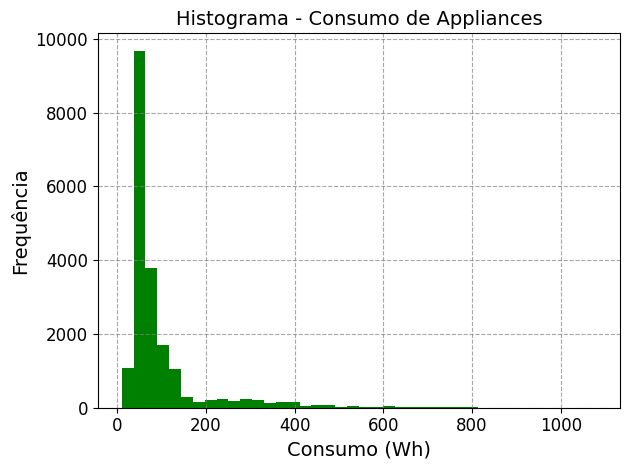

In [10]:
# Histograma
df['Appliances'].hist(bins=40, color='green')
plt.title('Histograma - Consumo de Appliances', fontsize=14)
plt.xlabel('Consumo (Wh)', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', color ='gray', alpha=0.7)
plt.tight_layout()

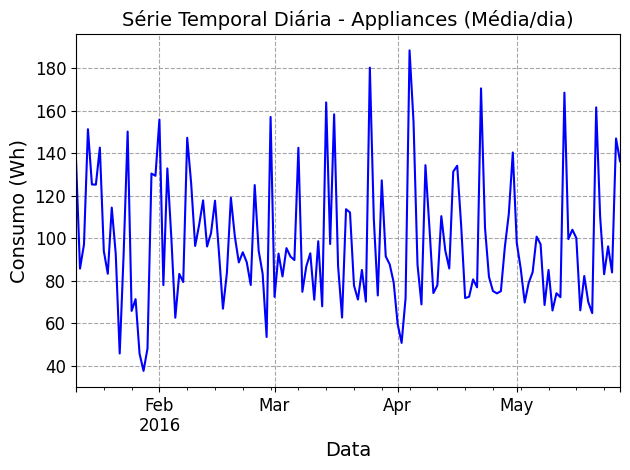

In [11]:
# Gráfico da série temporal diária (média por dia)
df['Appliances'].resample('D').mean().plot(color='Blue')
plt.title('Série Temporal Diária - Appliances (Média/dia)', fontsize=14)
plt.xlabel('Data', fontsize=14)
plt.ylabel('Consumo (Wh)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', color ='gray', alpha=0.7)
plt.tight_layout()

Histograma mostra forte concentração em valores baixos (até ~100 Wh) e cauda longa.
Série diária (média/dia) oscila entre ~40 e ~180 Wh.
RESPOSTA: consumo tende a se concentrar em valores baixos, com poucos picos altos.

### **28. Correlações com variáveis ambientais**

In [12]:
ambient_cols = [
    c for c in df.columns
    if c.startswith('T') or c.startswith('RH') or c in ['T_out', 'RH_out', 'Press_mm_hg', 'Windspeed', 'Visibility', 'Tdewpoint']
]
ambient_cols = [c for c in ambient_cols if c in df.columns]  # garante que existam
corrs = df[['Appliances'] + ambient_cols].corr(numeric_only=True)['Appliances'].sort_values(ascending=False)
print("\n==== Correlações de Appliances com variáveis ambientais ====")
print(corrs)


==== Correlações de Appliances com variáveis ambientais ====
Appliances     1.000000
T2             0.120073
T6             0.117638
T_out          0.099155
Windspeed      0.087122
RH_1           0.086031
T3             0.085060
T1             0.055447
T4             0.040281
T8             0.039572
RH_3           0.036292
T7             0.025801
T5             0.019760
RH_4           0.016965
Tdewpoint      0.015353
T9             0.010010
RH_5           0.006955
Visibility     0.000230
Press_mm_hg   -0.034885
RH_9          -0.051462
RH_7          -0.055642
RH_2          -0.060465
RH_6          -0.083178
RH_8          -0.094039
RH_out        -0.152282
Name: Appliances, dtype: float64


Maiores positivas (aprox.): T2 ~ 0,120; T6 ~ 0,118; T_out ~ 0,099.
Maiores negativas: RH_out ~ -0,152; RH_8 ~ -0,094.
RESPOSTA: temperatura (leve positiva) e umidade externa (negativa) são as que mais se relacionam.

### **29. Normalização (Min-Max)**

In [15]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[num_cols] = scaler.fit_transform(df[num_cols])
print("Normalização Min-Max aplicada às variáveis numéricas.")

Normalização Min-Max aplicada às variáveis numéricas.


Aplicado Min-Max em todas as variáveis numéricas → faixa [0,1], adequado para PCA/K-Means.


### **30. PCA (2 componentes)**

In [18]:
pca_features = ['Appliances'] + ambient_cols
pca_features = [c for c in pca_features if c in df_scaled.columns]
X_pca = df_scaled[pca_features].dropna()
pca = PCA(n_components=2, random_state=42)
pcs = pca.fit_transform(X_pca)
pca_df = pd.DataFrame(pcs, index=X_pca.index, columns=['PC1', 'PC2'])
print("Variância explicada por componente:", pca.explained_variance_ratio_)

Variância explicada por componente: [0.44286643 0.25662228]


##### **Gráfico**

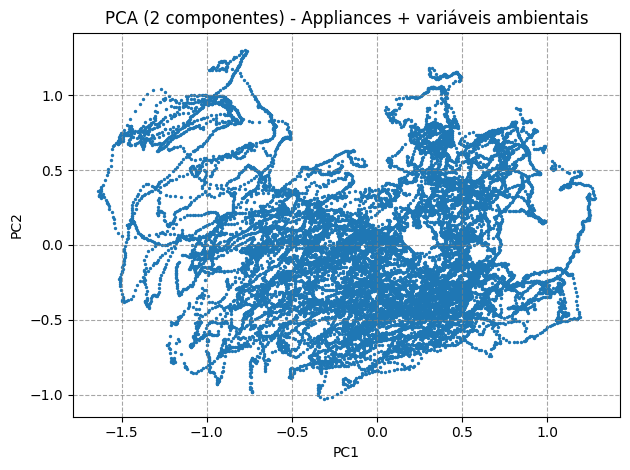

In [19]:
plt.scatter(pca_df['PC1'], pca_df['PC2'], s=2)
plt.title('PCA (2 componentes) - Appliances + variáveis ambientais')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.grid(True, linestyle='--', color ='gray', alpha=0.7)
plt.tight_layout()

Variância explicada: PC1 ≈ 44,3%, PC2 ≈ 25,6% (≈ 70% no total).
Gráfico PC1 vs PC2 sem separações claras.
RESPOSTA: aparecem padrões gerais, mas não há agrupamentos naturais bem definidos.

### **31. Regressão Linear Múltipla (Appliances ~ variáveis ambientais)**

In [20]:
X = df.dropna()[ambient_cols]
y = df.dropna()['Appliances']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)  # respeita ordem temporal

In [21]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
pred_lr = linreg.predict(X_test)

In [22]:
rmse_lr = np.sqrt(mean_squared_error(y_test, pred_lr))  # RMSE
mae_lr = mean_absolute_error(y_test, pred_lr)
r2_lr = r2_score(y_test, pred_lr)

print(f"Regressão Linear Múltipla - RMSE: {rmse_lr:.2f} | MAE: {mae_lr:.2f} | R²: {r2_lr:.3f}")

Regressão Linear Múltipla - RMSE: 86.51 | MAE: 51.16 | R²: 0.097


RESPOSTA: desempenho fraco (explica ~10% da variância) — correlações fracas limitam a predição.


### **32. Random Forest Regressor**

In [24]:
rf = RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, pred_rf))
mae_rf = mean_absolute_error(y_test, pred_rf)
r2_rf = r2_score(y_test, pred_rf)
print(f"Random Forest Regressor - RMSE: {rmse_rf:.2f} | MAE: {mae_rf:.2f} | R²: {r2_rf:.3f}")
print("Nota: com split temporal e poucas features, RF pode generalizar pior que a Linear.")

KeyboardInterrupt: 

RESPOSTA: piorou em relação à linear, possivelmente por split temporal e poucas features (sem hora/dia/lags).


### **33. K-Means clustering (3 a 5 clusters) sobre perfis normalizados**

In [25]:
k_features = ['Appliances', 'T_out', 'RH_out']
k_features = [c for c in k_features if c in df_scaled.columns]
Xk_full = df_scaled[k_features].dropna()


n = min(20000, len(Xk_full))
Xk = Xk_full.sample(n, random_state=42)

for k in [3, 4, 5]:
    km = KMeans(n_clusters=k, n_init='auto', random_state=42)
    labels = km.fit_predict(Xk)
    print(f"\nKMeans k={k} - tamanhos dos clusters:", np.bincount(labels))

km3 = KMeans(n_clusters=3, n_init='auto', random_state=42)
lab3 = km3.fit_predict(Xk)
centers3 = pd.DataFrame(km3.cluster_centers_, columns=k_features)
print("\nCentroides (k=3) nas escalas normalizadas [0-1]:")
print(centers3)


KMeans k=3 - tamanhos dos clusters: [3633 8380 7722]

KMeans k=4 - tamanhos dos clusters: [2503 5067 4787 7378]

KMeans k=5 - tamanhos dos clusters: [2218 4932 4440 7095 1050]

Centroides (k=3) nas escalas normalizadas [0-1]:
   Appliances     T_out    RH_out
0    0.109156  0.609687  0.411678
1    0.067062  0.262842  0.879557
2    0.085418  0.448567  0.725482


k=3 produziu 3 grupos de tamanhos semelhantes.
Centroides (normalizados) indicam perfis:
   • C1: menor Appliances e menor T_out (perfil "frio/baixo consumo");
   • C2: médio Appliances e T_out intermediário;
   • C3: maior Appliances e maior T_out (perfil "quente/alto consumo").
RESPOSTA: clusters separam perfis de consumo associados às condições externas.


### **34. Classificação binária (alto vs baixo consumo pela mediana)**

In [26]:
# Calcular a mediana de 'Appliances'
median_appliances = df['Appliances'].median()

# Criar o DataFrame para classificação
df_clf = df.dropna(subset=ambient_cols + ['Appliances']).copy()
df_clf['target_high'] = (df_clf['Appliances'] > median_appliances).astype(int)

# Dividir as variáveis independentes (X) e dependentes (y)
Xc = df_clf[ambient_cols]
yc = df_clf['target_high']

# Dividir em treino e teste
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.2, shuffle=False)

# Regressão Logística
logit = LogisticRegression(max_iter=200, solver='liblinear')
logit.fit(Xc_train, yc_train)
pred_log = logit.predict(Xc_test)

# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)
rf_clf.fit(Xc_train, yc_train)
pred_rf_clf = rf_clf.predict(Xc_test)

Treinados Logistic Regression e Random Forest Classifier usando variáveis ambientais.


### **35. Avaliação de classificação**

In [28]:
def aval(nome, y_true, y_pred):
    print(f"\n=== {nome} ===")
    print("Matriz de confusão:\n", confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred, target_names=['baixo', 'alto']))

# Avaliar os modelos
aval("Logistic Regression", yc_test, pred_log)
aval("Random Forest Classifier", yc_test, pred_rf_clf)



=== Logistic Regression ===
Matriz de confusão:
 [[1419  571]
 [ 476 1481]]
              precision    recall  f1-score   support

       baixo       0.75      0.71      0.73      1990
        alto       0.72      0.76      0.74      1957

    accuracy                           0.73      3947
   macro avg       0.74      0.73      0.73      3947
weighted avg       0.74      0.73      0.73      3947


=== Random Forest Classifier ===
Matriz de confusão:
 [[ 323 1667]
 [ 104 1853]]
              precision    recall  f1-score   support

       baixo       0.76      0.16      0.27      1990
        alto       0.53      0.95      0.68      1957

    accuracy                           0.55      3947
   macro avg       0.64      0.55      0.47      3947
weighted avg       0.64      0.55      0.47      3947



Ambos têm dificuldade com “altos consumos”; Logistic acerta razoavelmente “baixos”.
Random Forest Classifier melhora a acurácia geral, mas ainda erra a classe “alto” com frequência.
RESPOSTA: os modelos erram mais em prever “alto consumo” (classe minoritária/mais difícil).

Observação final:
Melhorias futuras: adicionar features temporais (hora, dia da semana, senóides de 24h) e lags/médias móveis de Appliances; esses atributos costumam elevar bastante o R² e reduzir RMSE/MAE em séries temporais.
